In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# 数据加载

In [2]:
df = pd.read_csv('Churn-Modelling-new.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited        EB  
0        101348.88       1  0.000000  
1        112542.58       0  0.744677  
2        113931.57       1  1.401375  
3 

# 数据预处理

### 删除无关变量

RowNumber：行号 × <br>
CustomerID：用户编号 ×<br>
Surname：用户姓名 ×<br>
CreditScore：信用分数<br>
Geography：用户所在国家/地区 ×<br>
Gender：用户性别<br>
Age：年龄<br>
Tenure：当了本银行多少年用户<br>
Balance：存贷款情况<br>
NumOfProducts：使用产品数量<br>
HasCrCard：是否有本行信用卡<br>
IsActiveMember：是否活跃用户<br>
EstimatedSalary：估计收入<br>
Exited：是否已流失，这将作为我们的标签数据<br>

In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname','EB'], inplace=True)

### 连续属性的离散化：等宽分箱

In [5]:
df['CreditScore'] = pd.cut(df['CreditScore'], bins=10)  # 将数据分成4个等宽的区间
df['Age'] = pd.cut(df['Age'], bins=10) 
df['Balance'] = pd.cut(df['Balance'], bins=10) 
df['EstimatedSalary'] = pd.cut(df['EstimatedSalary'], bins=10) 

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['CreditScore'] = label_encoder.fit_transform(df['CreditScore'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Balance'] = label_encoder.fit_transform(df['Balance'])
df['EstimatedSalary'] = label_encoder.fit_transform(df['EstimatedSalary'])

### 标称属性处理

In [11]:
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [12]:
print(df.head())

   CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0            5          0       0    3       2        0              1   
1            5          2       0    3       1        3              1   
2            3          0       0    3       8        6              3   
3            6          0       0    2       1        0              2   
4            9          2       0    3       2        5              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1                5       1  
1          0               1                5       0  
2          1               0                5       1  
3          0               0                4       0  
4          1               1                3       0  


# 数据集划分

In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']

按照70%的比例随机选择训练样本（剩下的作为测试样本）

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 模型训练

In [17]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

# 模型评估

In [18]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [19]:
# 预测概率值（用于计算AUC和ROC曲线）
y_prob = clf.predict_proba(X_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_prob)

# 计算F1分数
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)

# 打印评估结果
print("AUC: {:.2f}".format(auc_score))
print("F1 Score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

AUC: 0.84
F1 Score: 0.85
Accuracy: 0.86


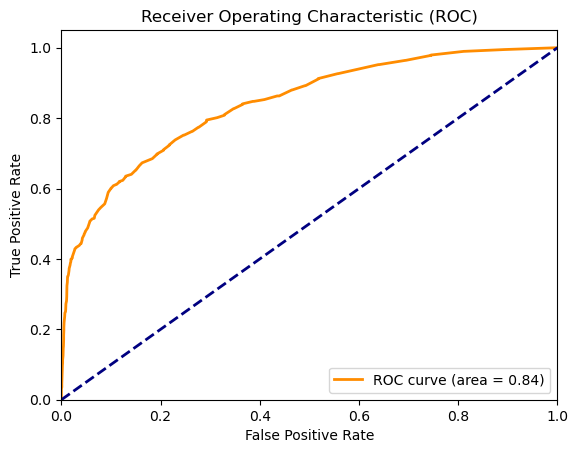

In [20]:
# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()